# Проект: Статистический анализ данных

***О проекте:***

Переданы данные сервиса аренды самокатов о некоторых пользователях из нескольких городов, а также об их поездках.Чтобы совершать поездки по городу, пользователи пользуются мобильным приложением. Сервисом можно пользоваться с подпиской и без подписки. Необходимо проанализировать данные и проверить ряд гипотез, которые могут помочь бизнесу вырасти.

### Открываем файлы с данными и изучим общую информацию

#### Шаг 1. Загрузка данных

In [1]:
# импортируем необходимые библиотеки:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
# считаем CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафреймы

# users - информация о рользователях
users = pd.read_csv('users_go.csv')

# rides - информация о поездках
rides = pd.read_csv('rides_go.csv', parse_dates=['date'])

# subscriptions - информация о подписках
subscriptions = pd.read_csv('subscriptions_go.csv')

In [3]:
# определим функцию для оптимизации кода вывода первичной информации о датафрейме

def basic_info(dataset):
    # вывод первых пяти строк DataFrame
    print()
    print('первые 5 строк')
    display(dataset.head())
    print()
    
    # вывод информации о DataFrame
    dataset.info()
    print()

In [4]:
# применим функцию к датафрейму users для ознакомления с основными параметрами
basic_info(users)


первые 5 строк


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB



In [5]:
# применим функцию к датафрейму rides для ознакомления с основными параметрами
basic_info(rides)


первые 5 строк


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB



In [6]:
# ознакомимся с основными статистиками фрейма rides
rides.describe()

,user_id,distance,duration,date
count,18068.000000,18068.000000,18068.000000,18068
mean,842.869936,3070.659976,17.805011,2021-06-30 19:47:21.266327296
min,1.000000,0.855683,0.500000,2021-01-01 00:00:00
25%,487.000000,2543.226360,13.597563,2021-04-02 00:00:00
50%,889.000000,3133.609994,17.678395,2021-06-30 00:00:00
75%,1213.250000,3776.222735,21.724800,2021-09-28 00:00:00
max,1534.000000,7211.007745,40.823963,2021-12-30 00:00:00
std,434.734317,1116.831209,6.091051,NaN


In [7]:
# применим функцию к датафрейму subscriptions для ознакомления с основными параметрами
basic_info(subscriptions)


первые 5 строк


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes



#### Шаг 2. Предобработка данных

**Датафрейм users**

In [8]:
# изучим датафрейм на наличие полных дубликатов
users.duplicated().sum()

31

In [9]:
# удалим из датафрейма явные дубликаты
users.drop_duplicates(inplace=True)

In [10]:
# проверим наличие дубликатов
users.duplicated().sum()

0

In [11]:
# проверим количество строк в таблице
users.shape[0]

1534

In [12]:
# изучим уникальные значения столбца subscription_type
users['subscription_type'].value_counts()

subscription_type
free     835
ultra    699
Name: count, dtype: int64

In [13]:
# изучим уникальные значения столбца city для выявления неявных дубликатов
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [14]:
# проверим уникальность значений в столбце user_id
len(users['user_id'].unique())

1534

In [15]:
# изучим уникальные значения столбца name для выявления неявных дубликатов
users['name'].sort_values().unique()

array(['Агата', 'Аделина', 'Адель', 'Айдар', 'Александр', 'Александра',
       'Алексей', 'Алина', 'Алиса', 'Алия', 'Алла', 'Альберт', 'Альбина',
       'Алёна', 'Амалия', 'Амина', 'Амир', 'Анастасия', 'Анатолий',
       'Ангелина', 'Андрей', 'Анжелика', 'Анна', 'Антон', 'Антонина',
       'Ариана', 'Арина', 'Арсен', 'Арсений', 'Артемий', 'Артур', 'Артём',
       'Богдан', 'Борис', 'Вадим', 'Валентина', 'Валерий', 'Валерия',
       'Варвара', 'Василий', 'Василина', 'Василиса', 'Вера', 'Вероника',
       'Виктор', 'Виктория', 'Виолетта', 'Виталий', 'Виталина', 'Влад',
       'Влада', 'Владимир', 'Владислав', 'Владислава', 'Всеволод',
       'Вячеслав', 'Галина', 'Георгий', 'Герман', 'Глеб', 'Гордей',
       'Григорий', 'Давид', 'Дамир', 'Даниил', 'Данил', 'Данила',
       'Даниэль', 'Дарина', 'Дарья', 'Демид', 'Денис', 'Диана', 'Дмитрий',
       'Ева', 'Евгений', 'Евгения', 'Егор', 'Екатерина', 'Елена',
       'Елизавета', 'Елисей', 'Есения', 'Жанна', 'Зарина', 'Захар',
       'Злата', 

In [16]:
# заменим имена для удобства
# создадим словарь для замены имен
name_list_change = {
    'Алёна' : 'Алена'
    ,'Артём' : 'Артем'
    ,'Влад' : 'Владислав'
    ,'Влада' : 'Владислава'
    ,'Наталия' : 'Наталья'
    ,'Наташа' : 'Наталья'
}

# заменим значения 
users['name'] = users['name'].replace(name_list_change, regex=False)

In [17]:
# проверим уникальные значения столбца name
users['name'].sort_values().unique()

array(['Агата', 'Аделина', 'Адель', 'Айдар', 'Александр', 'Александра',
       'Алексей', 'Алена', 'Алина', 'Алиса', 'Алия', 'Алла', 'Альберт',
       'Альбина', 'Амалия', 'Амина', 'Амир', 'Анастасия', 'Анатолий',
       'Ангелина', 'Андрей', 'Анжелика', 'Анна', 'Антон', 'Антонина',
       'Ариана', 'Арина', 'Арсен', 'Арсений', 'Артем', 'Артемий', 'Артур',
       'Богдан', 'Борис', 'Вадим', 'Валентина', 'Валерий', 'Валерия',
       'Варвара', 'Василий', 'Василина', 'Василиса', 'Вера', 'Вероника',
       'Виктор', 'Виктория', 'Виолетта', 'Виталий', 'Виталина',
       'Владимир', 'Владислав', 'Владислава', 'Всеволод', 'Вячеслав',
       'Галина', 'Георгий', 'Герман', 'Глеб', 'Гордей', 'Григорий',
       'Давид', 'Дамир', 'Даниил', 'Данил', 'Данила', 'Даниэль', 'Дарина',
       'Дарья', 'Демид', 'Денис', 'Диана', 'Дмитрий', 'Ева', 'Евгений',
       'Евгения', 'Егор', 'Екатерина', 'Елена', 'Елизавета', 'Елисей',
       'Есения', 'Жанна', 'Зарина', 'Захар', 'Злата', 'Иван', 'Игнат',
       

 **Предварительный вывод по изучению таблицы users**

- данные считались корректно
- нет пропущенных значений
- выявлены явные дубликаты (31 строка) - удалены
- типы данных для столбцов выбраны корректно
- неявные дубликаты в столбце name (Наталия, Наталья,Наташа и София, Софья и Влад, Владислав и Влада, Владислава) но тк user_id в таблице уникальны можно утверждать что это разные пользователи. Для удобства привели к единому. Также имя Алена и Артем написано через ё - исправлено

**Датафрейм rides**

In [18]:
# изучим датафрейм на наличие полных дубликатов
rides.duplicated().sum()

0

In [19]:
# округлим для удобства значения в столбце distance до двух знаков после запятой
rides['distance'] = rides['distance'].round(2)

In [20]:
# согласно заданию округлим значения в столбце duration до следующего целого
rides['duration'] = np.ceil(rides['duration'])

# изменим тип данных столбца duration на целочисленный
rides['duration'] = rides['duration'].astype(int)

In [21]:
# создадим новый столбец month_nomber в датафрейме rides с номером месяца на основе столбца date
rides['month_nomber'] = pd.DatetimeIndex(rides['date']).month

# проверим внесенные изменения
rides.head()

,user_id,distance,duration,date,month_nomber
0,1,4409.92,26,2021-01-01,1
1,1,2617.59,16,2021-01-18,1
2,1,754.16,7,2021-04-20,4
3,1,2694.78,19,2021-08-11,8
4,1,4028.69,27,2021-08-28,8


In [22]:
# найдем минимальную и максимальную даты поездок для определения периода представленных данных

min_date = rides['date'].min()
max_date = rides['date'].max()

f'Поездки совершались в период с {min_date} по {max_date}'

'Поездки совершались в период с 2021-01-01 00:00:00 по 2021-12-30 00:00:00'

 **Предварительный вывод по изучению таблицы users**

- данные считались корректно
- нет пропущенных значений
- нет явных дубликатов
- необходимо привести столбец date к типу данных дата - приведено
- необходимо округлить столбец duration до следующего целого и изменить тип данных - приведено

**Датафрейм subscriptions**

**Предварительный вывод по изучению таблицы subscriptions**

- данные считались корректно
- нет пропущенных значений
- типы данных для столбцов выбраны корректно

#### Шаг 3. Исследовательский анализ данных

**Частота встречаемости городов**

In [23]:
# частота встречаемости городов - количество
city_number = users['city'].value_counts()
city_number

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

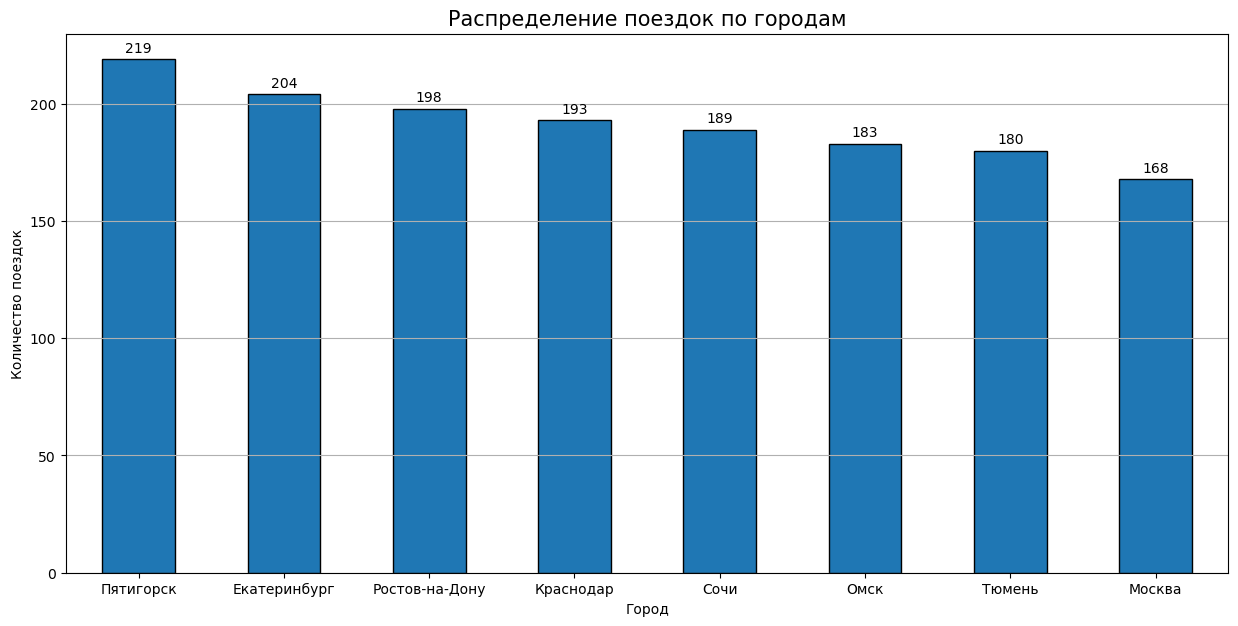

In [24]:
# построим столбчатую диаграмму
plt.figure(figsize=(15, 7))
city_number.plot(kind='bar', edgecolor='black')

plt.title('Распределение поездок по городам', fontsize=15)
plt.xlabel('Город')
plt.ylabel('Количество поездок')

plt.grid(axis='y')
plt.xticks(rotation=0)

# добавим количество городов для каждого столбца
for i, count in enumerate(city_number):
    plt.text(i, count+3, f'{count}', color='black', ha='center')


plt.show()

In [25]:
# частота встречаемости городов в процентах
t = users.groupby('city').size() / len(users) * 100
t.round(2)

city
Екатеринбург      13.30
Краснодар         12.58
Москва            10.95
Омск              11.93
Пятигорск         14.28
Ростов-на-Дону    12.91
Сочи              12.32
Тюмень            11.73
dtype: float64

Больше всего поездок совершено в Пятигорске, меньше всего - в Москве. Сильных перекосов данных в пользу какого либо одного города не наблюдается. Также можно сделать предположение что больше поездок совершается в городах, расположенных южнее, тк там благоприятнее погодные условия и сезон продолжительнее.

Можно предположить что помимо разницы в климате (Пятигорск южный город и сезон проката там должен быть больше) разница обусловлена тем, что Пятигорск меньше Москвы и преодолевать необходимые расстояния проще, тк требуемые локации находятся ближе. Также это может зависить от развитости трансортной инфраструктуры. В Москве общественный транспорт развит хорошо, удобнее и быстрее добраться до места не используя самокат. В Пятигорске же удобнее вместо ожидания общественного транспорта (которое очевидно дольше чем в Москве) воспользоваться арендой самоката для экономии времени.

**Соотношение пользователей с подпиской и без подписки**

In [26]:
# количество пользователей с подпиской и без
users_subscription = users['subscription_type'].value_counts()
users_subscription

subscription_type
free     835
ultra    699
Name: count, dtype: int64

In [27]:
# процент пользователей с подпиской и без
(users['subscription_type'].value_counts() / len(users) * 100).round(2)

subscription_type
free     54.43
ultra    45.57
Name: count, dtype: float64

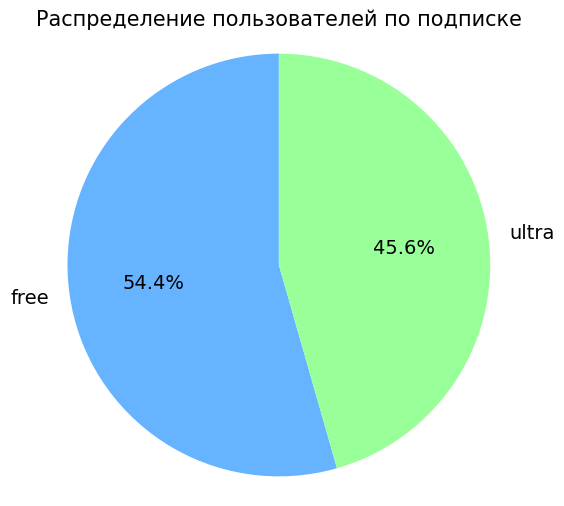

In [28]:
# определим количество пользователей с подпиской и без
subscription_counts = users['subscription_type'].value_counts()

# построим круговую диаграмму для отображения разности в доле клиентов
plt.figure(figsize=(6, 6))

plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%'
        , startangle=90, colors=['#66b3ff','#99ff99'], textprops={'fontsize': 14})

plt.title('Распределение пользователей по подписке', fontsize=15)
plt.axis('equal')  # Для того чтобы круговая диаграмма была круглой

plt.show()

In [29]:
subscription_counts

subscription_type
free     835
ultra    699
Name: count, dtype: int64

In [30]:
# рассчитаем на сколько процентов пользователей без подписки больше чем пользователей с подпиской
subscription_difference = ((users_subscription['free'] - users_subscription['ultra']) / users_subscription['ultra']) * 100
subscription_difference.round(2)

19.46

пользователей без подписки почти на 20% больше чем пользователей с подпиской

**Возраст пользователей**

In [31]:
# рассмотрим распределение данных в столбце age
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [32]:
# посмотрим на уникальные возраста пользователей
users['age'].sort_values().unique()

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 43], dtype=int64)

In [33]:
# посмотрим на количество поездок для каждого возраста
users['age'].value_counts()

age
25    145
24    132
26    131
23    129
22    119
27    119
28    112
21     93
20     71
30     68
29     68
31     48
19     47
18     46
32     41
33     39
17     26
16     19
34     19
35     15
15     13
14      9
13      8
36      6
12      4
38      3
37      2
39      1
43      1
Name: count, dtype: int64

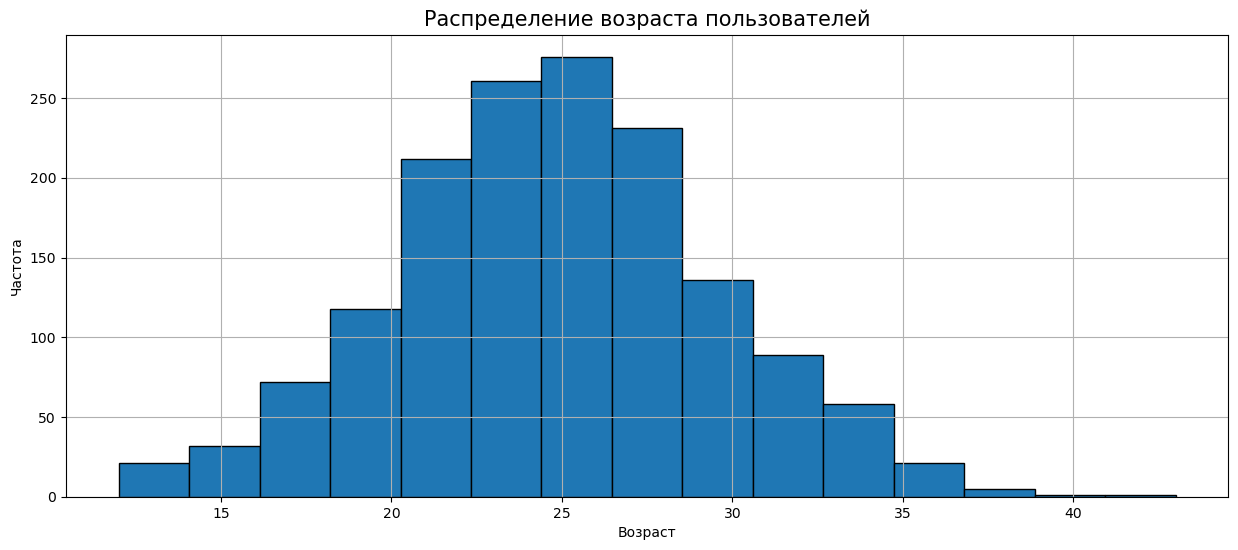

In [34]:
# построим гистограмму для возрастов пользователей
plt.figure(figsize=(15, 6))
plt.hist(users['age'], bins=15, edgecolor='black')

plt.title('Распределение возраста пользователей', fontsize=15)
plt.xlabel('Возраст')
plt.ylabel('Частота')

plt.grid(True)
plt.show()

большинство поездок совершается пользователями в возрасте от 22 до 28 лет. Максимальное количество поездок сделано пользователями в возрасте 25, 24 и 26 лет.

**Расстояние, которое пользователь преодолел за одну поездку**

In [35]:
# ознакомимся с первыми строками датасета rides
rides.head()

,user_id,distance,duration,date,month_nomber
0,1,4409.92,26,2021-01-01,1
1,1,2617.59,16,2021-01-18,1
2,1,754.16,7,2021-04-20,4
3,1,2694.78,19,2021-08-11,8
4,1,4028.69,27,2021-08-28,8


In [36]:
# ознакомимся с распределением данных в столбце distance
rides['distance'].describe()

count    18068.000000
mean      3070.659992
std       1116.831222
min          0.860000
25%       2543.227500
50%       3133.610000
75%       3776.220000
max       7211.010000
Name: distance, dtype: float64

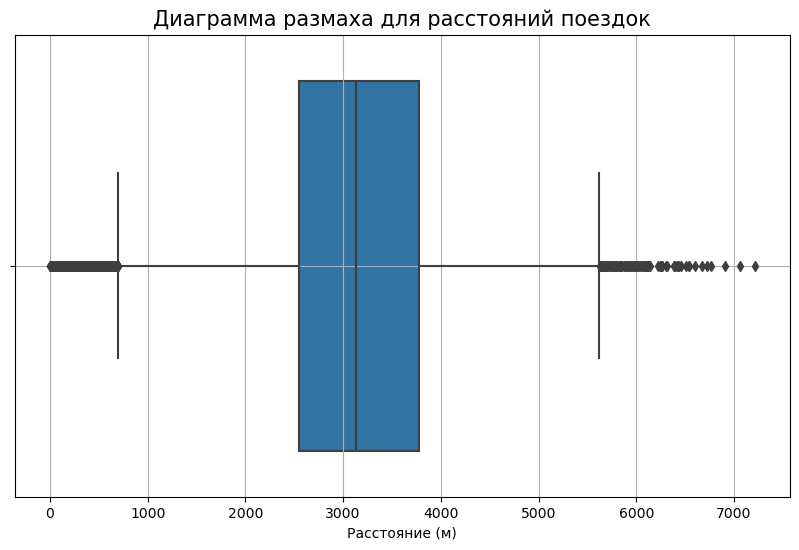

In [37]:
# построение диаграммы размаха
plt.figure(figsize=(10, 6))
sns.boxplot(x=rides['distance'])

plt.title('Диаграмма размаха для расстояний поездок', fontsize=15)
plt.xlabel('Расстояние (м)')
plt.grid(True)

plt.show()

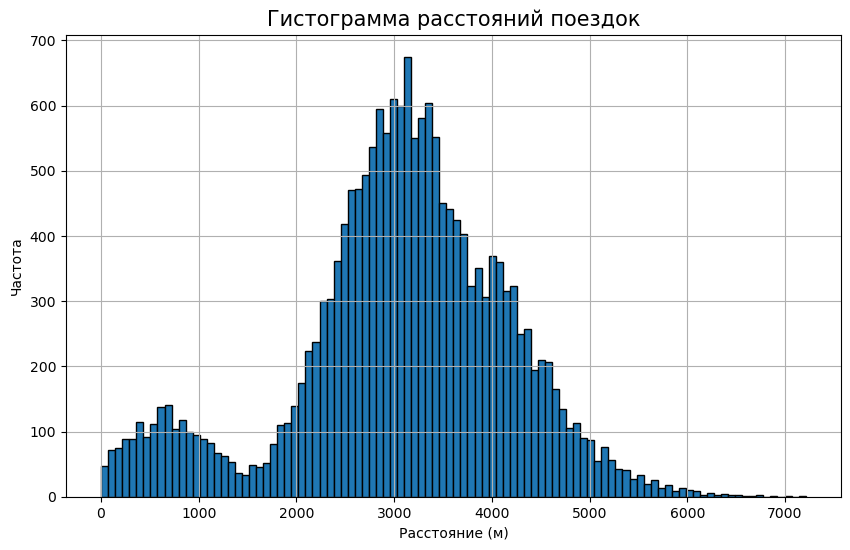

In [38]:
# построим гистограмму
plt.figure(figsize=(10, 6))
plt.hist(rides['distance'], bins=100, edgecolor='black')  

plt.title('Гистограмма расстояний поездок', fontsize=15)
plt.xlabel('Расстояние (м)')
plt.ylabel('Частота')
plt.grid(True)

plt.show()

In [39]:
# количество поездок менее 100 м
len(rides[rides['distance'] < 100])

78

In [40]:
# количество поездок более 5700 м 
len(rides[rides['distance'] > 5700])

100

Основное количество поездок осуществляется на расстояние от 2.5 до 3.8 км. Есть выбросы -  определенное количество сверхдальних поездок а также сверхкоротких, менее 100 м, последнее может быть связано что пользователя по тем или иным причинам не устроил арендованный самокат

больше совершает короткие поездки группа без подписки (1250 против 468), длинные данные разделились примерно поровну 4475 и 4906 соответственно.

Можно предположить что короткие поездки используются для необходимости оперативно добраться до определенной локации (близко находящаяся работа, остановка общественного транспорта и тд), в то время как длинные используются в основном для развлечения, прогулок и тд. (я еще проверил топ 5 возрастов для коротких и длинных - они примерно одинаковые)

**Продолжительность поездок**

In [41]:
# ознакомимся с распределением данных в столбце duration
rides['duration'].describe()

count    18068.000000
mean        18.303520
std          6.094928
min          1.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

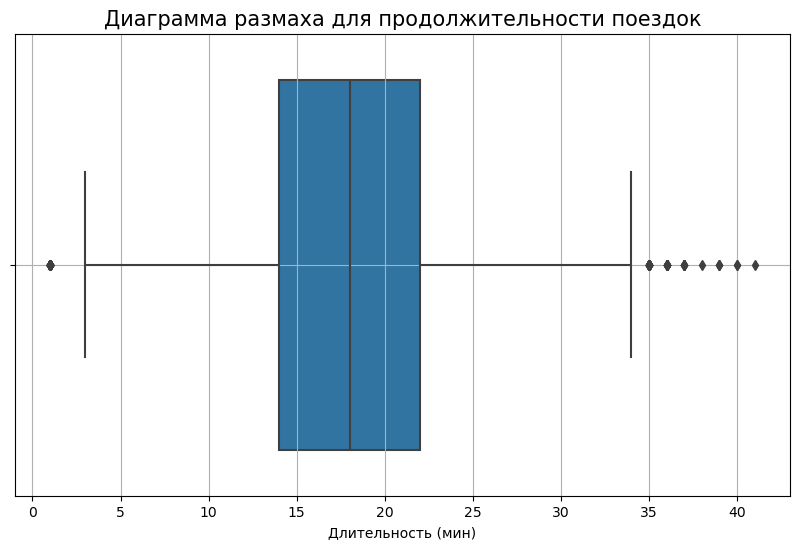

In [42]:
# построим ящичную диаграмму
plt.figure(figsize=(10, 6))
sns.boxplot(x=rides['duration'])

plt.title('Диаграмма размаха для продолжительности поездок', fontsize = 15)
plt.xlabel('Длительность (мин)')
plt.grid(True)

plt.show()

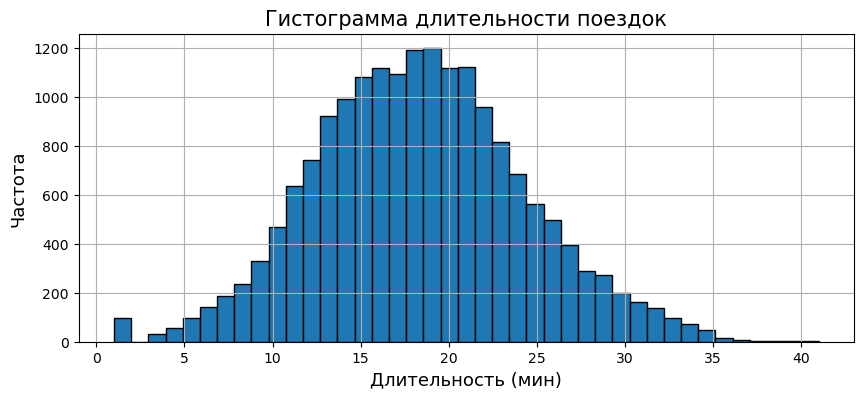

In [43]:
# построим гистограмму
plt.figure(figsize=(10, 4))
plt.hist(rides['duration'], bins=41, edgecolor='black')  

plt.title('Гистограмма длительности поездок', fontsize=15)
plt.xlabel('Длительность (мин)', fontsize=13)
plt.ylabel('Частота', fontsize=13)
plt.grid(True)

plt.show()

In [44]:
# количество поездок более 34 минут
len(rides[rides['duration'] > 34])

75

In [45]:
# количество поездок менее 2 минут
len(rides[rides['duration'] < 2])

95

Из гистограммы длительности поездок выдна явная аномалия в районе 2 минут. Рассмотрим подробнее

In [46]:
rides[rides['duration'] < 2]

,user_id,distance,duration,date,month_nomber
6531,701,4196.45,1,2021-08-31,8
6570,704,4830.82,1,2021-10-14,10
6680,712,4684.00,1,2021-03-04,3
6695,713,5215.64,1,2021-02-25,2
6768,718,5197.44,1,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.34,1,2021-01-19,1
17242,1477,6724.93,1,2021-01-12,1
17314,1483,4445.48,1,2021-03-06,3
17505,1496,5722.55,1,2021-02-14,2


In [47]:
rides[rides['duration'] < 2]['duration'].value_counts()

duration
1    95
Name: count, dtype: int64

Теперь видно что имеем 95 строк с поездкамипо одной минуте с пройдеными расстояниями более нескольких километров, что нереально. Скорее всего это какая то техническая ошибка при внесении в таблицу, но этих данных немного по сравнению с остальной информацией, дальнейшие рассчеты не исказит, поэтому оставим как есть.

 **Вывод:** Основная масса поездок длится от 14 до 22 минут. Всплеск на гистограмме длительности в районе одной двух минтут -  аномальные поездки длительностью 1 минута с большим километражом. В целом данные распределены равномерно относительно центра, на что указывает примерное равенство среднего и медианы.

In [48]:
# количество поездок по месяцам
rides['month_nomber'].value_counts()

month_nomber
1     1585
5     1560
6     1553
3     1544
7     1529
12    1527
8     1518
9     1517
4     1506
10    1475
11    1418
2     1336
Name: count, dtype: int64

#### Шаг 4. Объединение данных

In [49]:
# обьеденим датафреймы users, rides, subscriptions в один датафрейм.
# обьединение произведем поэтапно, сначала обьединим users и rides по столбцу user_id, затем результат обьединим с 
# subscriptions  по столбцу subscription_type

# обьединим датафреймы users и rides с помощью функции merge() по столбцу user_id
intermediate_value = users.merge(rides, on='user_id')
intermediate_value.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month_nomber
0,1,Кира,22,Тюмень,ultra,4409.92,26,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.59,16,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.16,7,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.78,19,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.69,27,2021-08-28,8


In [50]:
# обьединим промежуточный результат intermediate_value с датафреймом subscriptions по столбцу subscription_type
users_all = intermediate_value.merge(subscriptions, on='subscription_type') 

In [51]:
# ознакомимся с информацией о датафрейме
basic_info(users_all)


первые 5 строк


,user_id,name,age,city,subscription_type,distance,duration,date,month_nomber,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,27,2021-08-28,8,6,0,199



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  int32         
 7   date               18068 non-null  datetime64[ns]
 8   month_nomber       18068 non-null  int32         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(5), object(3)
memory usage: 1.5+ MB



In [52]:
# проверим на явные дубликаты
users_all.duplicated().sum()

0

После обьединения таблиц в финальной таблице получилось 18068 строк, пропущенных значений нет, явных дубликатов нет

In [53]:
# из датафрейма users_all создадим новый датафрейм c данными о пользователях без подписки
users_without_subscriptions = users_all[users_all['subscription_type'] == 'free']
users_without_subscriptions.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month_nomber,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.69,15,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.93,17,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.43,21,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.91,10,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.38,18,2021-02-14,2,8,50,0


In [54]:
# количество строк в датафрейме users_without_subscriptions
users_without_subscriptions.shape[0]

11568

In [55]:
# из датафрейма users_all создадим новый датафрейм c данными о пользователях с подпиской
users_with_subscriptions = users_all[users_all['subscription_type'] == 'ultra']
users_with_subscriptions.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month_nomber,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,27,2021-08-28,8,6,0,199


In [56]:
users_with_subscriptions.shape[0]

6500

**Сравнение продолжительности поездок пользователей с подпиской и без**

C:\Users\no_go\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\no_go\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


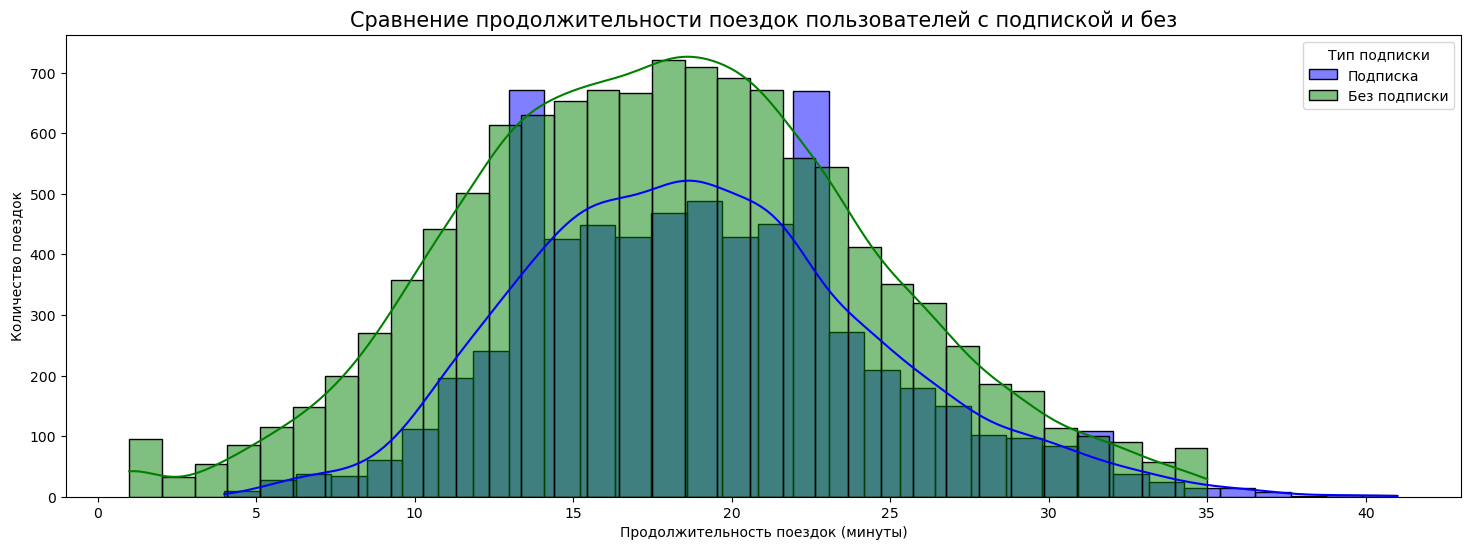

In [57]:
# объявляем график
plt.figure(figsize=(18, 6))

# добавляем гистограммы
sns.histplot(data=users_with_subscriptions, x='duration', bins=33, color='blue', label='Подписка', kde=True, alpha=0.5)
sns.histplot(data=users_without_subscriptions, x='duration', bins=33, color='green', label='Без подписки', kde=True, alpha=0.5)

# подписи и легенда
plt.title('Сравнение продолжительности поездок пользователей с подпиской и без', fontsize=15)
plt.xlabel('Продолжительность поездок (минуты)')
plt.ylabel('Количество поездок')
plt.legend(title='Тип подписки')

# отображение графика
plt.show()

In [58]:
users_with_subscriptions['duration'].describe()

count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64

In [59]:
users_without_subscriptions['duration'].describe()

count    11568.000000
mean        17.890992
std          6.330250
min          1.000000
25%         13.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64

**Вывод:**
- распределение продолжительности поездок у пользователей с подпиской и без очень похожи
- средняя продолжительность поездки с подпиской 19 минут, без - 18 минут
- основное количество поездок приходится на время от 13 до 22 минут

**Сравнение расстояния поездок пользователей с подпиской и без**

C:\Users\no_go\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\no_go\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


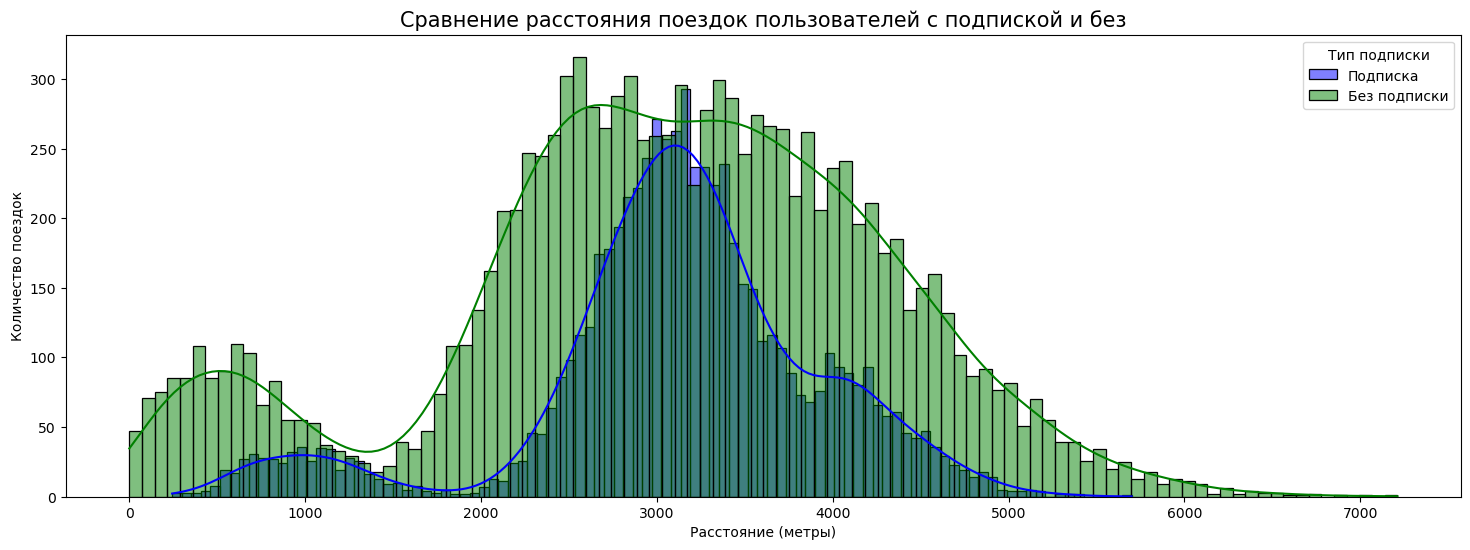

In [60]:
# объявляем график
plt.figure(figsize=(18, 6))

# добавляем гистограммы
sns.histplot(data=users_with_subscriptions, x='distance', bins=100, color='blue', label='Подписка', kde=True)
sns.histplot(data=users_without_subscriptions, x='distance', bins=100, color='green', label='Без подписки', kde=True)

# подписи и легенда
plt.title('Сравнение расстояния поездок пользователей с подпиской и без', fontsize=15)
plt.xlabel('Расстояние (метры)')
plt.ylabel('Количество поездок')
plt.legend(title='Тип подписки')

# отображение графика
plt.show()

In [61]:
users_with_subscriptions['distance'].describe()

count    6500.000000
mean     3115.445431
std       836.895369
min       244.210000
25%      2785.447500
50%      3148.640000
75%      3560.577500
max      5699.770000
Name: distance, dtype: float64

In [62]:
users_without_subscriptions['distance'].describe()

count    11568.000000
mean      3045.495284
std       1246.173810
min          0.860000
25%       2366.560000
50%       3114.650000
75%       3905.695000
max       7211.010000
Name: distance, dtype: float64

**Вывод:**
- распределение расстояния поездок у пользователей с подпиской и без также очень похожи
- средняя расстояние поездки с подпиской 3115 метров, без подписки - 3045 метров
- среднее и медианное расстояние у пользователей с подпиской незначительно выше чем у пользователей без подписки

#### Шаг 5. Подсчёт выручки

In [63]:
users_all.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month_nomber,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,27,2021-08-28,8,6,0,199


In [64]:
# определим сводную таблицу для нахождения суммарного расстояния, количества поездок  
# и суммарнго времени для каждого пользователя за каждый месяц
pivot_multi = pd.pivot_table(users_all
                             , index=['user_id', 'month_nomber']
                             , values=['distance'
                                       , 'duration'
                                       , 'subscription_type'
                                       , 'minute_price'
                                       ,'start_ride_price'
                                       , 'subscription_fee']
                             , aggfunc={'distance' : 'sum'
                                       , 'duration' : ['sum', 'count']
                                       , 'subscription_type' : 'first'
                                       , 'minute_price' : 'first'
                                       , 'start_ride_price' : 'first'
                                       , 'subscription_fee' : 'first'}).reset_index()


# ознакомимся с результатом
pivot_multi.head()

user_id month_nomber distance duration     minute_price start_ride_price  \
                            sum    count sum        first            first   
0       1            1  7027.51        2  42            6                0   
1       1            4   754.16        1   7            6                0   
2       1            8  6723.47        2  46            6                0   
3       1           10  5809.91        2  32            6                0   
4       1           11  7003.50        3  56            6                0   

  subscription_fee subscription_type  
             first             first  
0              199             ultra  
1              199             ultra  
2              199             ultra  
3              199             ultra  
4              199             ultra

In [65]:
# проверим данные на пропуски
pivot_multi.isna().sum()

user_id                     0
month_nomber                0
distance           sum      0
duration           count    0
                   sum      0
minute_price       first    0
start_ride_price   first    0
subscription_fee   first    0
subscription_type  first    0
dtype: int64

In [66]:
# переименуем столбцы
pivot_multi.columns=['user_id'
                     , 'month_nomber'
                     , 'sum_distance'
                     , 'count'
                     , 'sum_duration'
                     , 'minute_price'
                     , 'start_ride_price'
                     , 'subscription_fee'
                     , 'subscription_type']


# ознакомимся с результатом
pivot_multi.head()

,user_id,month_nomber,sum_distance,count,sum_duration,minute_price,start_ride_price,subscription_fee,subscription_type
0,1,1,7027.51,2,42,6,0,199,ultra
1,1,4,754.16,1,7,6,0,199,ultra
2,1,8,6723.47,2,46,6,0,199,ultra
3,1,10,5809.91,2,32,6,0,199,ultra
4,1,11,7003.50,3,56,6,0,199,ultra


In [67]:
# переставим столбцы в датафрейме согласно исходному
new_order = ['user_id'
             , 'month_nomber'
             , 'sum_distance'
             , 'sum_duration'
             , 'count'
             , 'subscription_type'
             , 'minute_price'
             , 'start_ride_price'
             , 'subscription_fee']


pivot_multi =pivot_multi[new_order] 

pivot_multi.head()

,user_id,month_nomber,sum_distance,sum_duration,count,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,1,7027.51,42,2,ultra,6,0,199
1,1,4,754.16,7,1,ultra,6,0,199
2,1,8,6723.47,46,2,ultra,6,0,199
3,1,10,5809.91,32,2,ultra,6,0,199
4,1,11,7003.50,56,3,ultra,6,0,199


In [68]:
# создадим новый столбец monthly_revenue с общей выручкой по пользователю за каждый месяц 
pivot_multi['monthly_revenue'] = ((pivot_multi['sum_duration'] * pivot_multi['minute_price']) +  
                                 (pivot_multi['start_ride_price'] * pivot_multi['count']) +  
                                  pivot_multi['subscription_fee'])      

# выведем первые 5 строк обновленного датафрейма для проверки
pivot_multi.head()

,user_id,month_nomber,sum_distance,sum_duration,count,subscription_type,minute_price,start_ride_price,subscription_fee,monthly_revenue
0,1,1,7027.51,42,2,ultra,6,0,199,451
1,1,4,754.16,7,1,ultra,6,0,199,241
2,1,8,6723.47,46,2,ultra,6,0,199,475
3,1,10,5809.91,32,2,ultra,6,0,199,391
4,1,11,7003.50,56,3,ultra,6,0,199,535


In [69]:
# средняя сумма которую приносит пользователь с подпиской в месяц
# вычисление средней выручки каждого пользователя
user_avg_revenue = pivot_multi.groupby(['user_id', 'subscription_type'])['monthly_revenue'].mean().reset_index()

# вычисление средней месячной выручки для пользователей с подпиской и без подписки
separate_avg_revenue = user_avg_revenue.groupby('subscription_type')['monthly_revenue'].mean()

separate_avg_revenue

subscription_type
free     328.516618
ultra    363.068525
Name: monthly_revenue, dtype: float64

In [70]:
# сумма выручки пользователей с подпиской
pivot_multi[pivot_multi['subscription_type'] == 'ultra']['monthly_revenue'].sum()

1644537

In [71]:
# сумма выручки пользователей без подписки
pivot_multi[pivot_multi['subscription_type'] == 'free']['monthly_revenue'].sum()

2234104

In [72]:
# check
pivot_multi['monthly_revenue'].sum()

3878641

#### Шаг 6. Проверка гипотез

**Шаг 6.1**

Проверим гипотезу о том, что пользователи с подпиской тратят  больше времени на поездки чем пользователи без подписки

Для проверки можно использовать статистический тест, такой как t-тест для двух независимых выборок. Этот тест поможет определить, есть ли статистически значимые различия в среднем времени поездок между двумя группами пользователей (с подпиской и без)

**Сформулируем гипотезы:**

***Нулевая гипотеза (H0):*** Среднее время поездок пользователей с подпиской не отличается от среднего времени поездок пользователей без подписки.

***Альтернативная гипотеза (H1):*** Среднее время поездок пользователей с подпиской больше, чем среднее время поездок пользователей без подписки.
    

In [73]:
users_all.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month_nomber,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,27,2021-08-28,8,6,0,199


In [74]:
# подготовим данные для теста для чего разделим время поездок на две группы: пользователи с подпиской и пользователи 
# без подписки.

# продолжительность поездок пользователей с подпиской
with_subscription = users_all[users_all['subscription_type'] == 'ultra']['duration']

# продолжительность поездок пользователей без подписки
without_subscription = users_all[users_all['subscription_type'] == 'free']['duration']

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(with_subscription, without_subscription, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.4959453720736625e-34
Отвергаем нулевую гипотезу


**Результат проверки гипотезы:** отвергаем нулевую гипотезу, среднее время поездки у пользователей с подпиской больше чем у пользователей без подписки. 

In [75]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


**Шаг 6.2**

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Проверим гипотезу, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

**Сформулируем гипотезы:**

***Нулевая гипотеза (H0):*** Среднее расстояние, которое проезжают пользователи с подпиской равно 3130 метров

***Альтернативная гипотеза (H1):*** Среднее расстояние, которое проезжают пользователи с подпиской меньше 3130 метров

In [76]:
# первые 5 строк датафрейма с пользователями с подпиской
users_with_subscriptions.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month_nomber,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,27,2021-08-28,8,6,0,199


In [77]:
# проведем односторонний тест

# информация о расстояниях для пользователей с подпиской
distance = users_with_subscriptions['distance']

# оптимальная дистанция
optimal_distance = 3130

alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(distance, optimal_distance, alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 


p-значение: 0.9195362605842414
Не отвергаем нулевую гипотезу


**Результат проверки гипотезы:** не получилось отвергнуть нулевую гипотезу, среднее расстояние у пользователей с подпиской - 3130 метров

In [78]:
# статистическая сводка по столбцу distance для пользователей с подпиской для самопроверки
users_with_subscriptions['distance'].describe()

count    6500.000000
mean     3115.445431
std       836.895369
min       244.210000
25%      2785.447500
50%      3148.640000
75%      3560.577500
max      5699.770000
Name: distance, dtype: float64

**Шаг 6.3**

Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. В данном примере воспользуемся проверкой гипотезы для средних двух генеральных совокупностей 

**Сформулируем гипотезы:**

***Нулевая гипотеза (H0):*** Средняя помесячная выручка пользователей с подпиской не отличается от средней помесячной выручки пользователей без подписки

***Альтернативная гипотеза (H1):*** Средняя помесячная выручка от пользователей с подпиской по месяцам выше, чем средняя помесячная выручка от пользователей без подписки

In [79]:
# выведем первые 5 строк датафрейма с выручкой
pivot_multi.head()

,user_id,month_nomber,sum_distance,sum_duration,count,subscription_type,minute_price,start_ride_price,subscription_fee,monthly_revenue
0,1,1,7027.51,42,2,ultra,6,0,199,451
1,1,4,754.16,7,1,ultra,6,0,199,241
2,1,8,6723.47,46,2,ultra,6,0,199,475
3,1,10,5809.91,32,2,ultra,6,0,199,391
4,1,11,7003.50,56,3,ultra,6,0,199,535


In [80]:
# выручка по месяцам пользователей с подпиской
revenue_with_subscription = pivot_multi[pivot_multi['subscription_type'] == 'ultra']['monthly_revenue']

# выручка по месяцам пользователей без подписки
revenue_without_subscription = pivot_multi[pivot_multi['subscription_type'] == 'free']['monthly_revenue']

In [81]:
# задаём уровень значимости
alpha = 0.05

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(revenue_with_subscription, revenue_without_subscription, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


**Результат проверки гипотезы:** отвергаем нулевую гипотезу, средняя помесячная выручка пользователей с подпиской выше, чем средеяя помесячная выручка пользователей без подписки.

**Шаг 6.4**

Для проверки гипотезы об обращениях в поддержку пользователей до и после обновления сервера, с которыми взаимодействует мобильное приложение (задание 6.4) нужно проверить гипотезу о равенстве средних для зависимых (парных) выборок, воспользовавшись методом scipy.stats.ttest_rel()

Итак для проверки гипотезы имеем данные данные о количестве обращений для каждого пользователя до обновления сервера и данные о количестве обращений для каждого пользователя после обновления сервера. Так как это зависимые выборки (данные брались дважды до внесения изменений и после) то нам нужно проверить гипотезу о равенстве средних для зависимых (парных) выборок, воспользовавшись методом scipy.stats.ttest_rel(). Этому методу необходимо передать два параметра: набор данных до обновления сервера и после. Оба набора должны быть одинаковы по размеру. Используем параметр alternative='greater', поскольку мы ожидаем, что количество обращений в техподдержку после обновления серверов снизилось. Сформулируем гипотезы: 
- ***Нулевая гипотеза (H0):*** Среднее количество обращений в поддержку до обновления сервера равно среднему количеству обращений после обновления сервера

- ***Альтернативная гипотеза (H1):*** Среднее количество обращений в поддержку до обновления сервера больше среднего количества обращений после обновления сервера

from scipy import stats as st

 данные об обращениях в поддержку до обновления сервера
data_before = data['count_before']

 данные об обращениях в поддержку после обновления сервера
data_after = data['count_after']

 задаем уровень статистической значимости
alpha = 0.05 

 проведем парный t-тест с альтернативной гипотезой 'greater'
results = st.ttest_rel(data_before, data_after, alternative='greater')

выведем на экран полученное p-значение
print('p-значение:', results.pvalue)

 сравним p-значение с заданным уровнем статистической значимости alpha
if results.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу о равенстве среднего количества обращений до и после обновления сервера')
else:
    print('Не удалось отвергнуть нулевую гипотезу ')


При p-значениее меньше заданного уровня статистической значимости позволяет нам отвергнуть нулевую гипотезу. Это означает, что количество обращений в техподдержку действительно снизилось после обновления серверов. Чем меньше будет p-значение тем сильнее докозательство против нулевой гипотезы и тем болше уверенность что наблюдаемое изменение обращений не будет являтся случайным.

***ОБЩИЙ ВЫВОД:***

В рамках данного проекта были выполнены следующие шаги:

- Был проведен анализ предоставленных наборов данных, ознакомление с их структурой, переменными и особенностями.

- Проведена предварительная обработка данных, включающая в себя поиск пропущенных значений, явных неявных дубликатов,поиск выбросов и аномалий, приведение типов данных к нужному формату, создание новых датафреймов и столбцов, необходимых для последующей работы.

- В ходе исследовательского анализа была описана и визуализирована общая информация о пользователях и поездках, такая как частота встречаемости городов, соотношение пользователей с подпиской и без подписки, возраст пользователей, расстояние, которое пользователь преодолел за одну поездку, продолжительность поездок.

- Пользователей без подписки на 20 процентов больше чем пользователей с подпиской, самое большое количество поездок совершено в городе Пятигорск, за ним следуют другие города юга России с аналогичными благоприятными климатическими условиями. Меньше всего поездок совершено в Москве. Ездовое поведение пользователей с подпиской и без примерно одинаковое. У них очень похожи распределения средней продожительности поездок и среднего расстояния.

- Также в ходе работы был проверен ряд гипотез на основании чего можно сделать следующие выводы: среднее время, проведенное в пути выше у пользователей с подпиской, помесячная выручка у пользователей с подпиской выше, чем у пользователей без подписки. Соответственно пользователи с подпиской выгоднее для компании чем пользователи без подписки. Также установлено что среднее преодолеваемое расстояние у пользователей с подпиской равно 3130 метров, что равно  оптимальному расстоянию с точки зрения износа самоката, а следовательно благоприятно для сохранения парка самокатов в работоспособном состоянии.   

***Дополнение:***
- анализ был произведен на основании данных за 2021 год.
- в целом со всех пользователей была получена выручка в размере 3878641 рублей, из которых пользовател с подпиской принесли 1644537 рублей а пользователи без подписки 2234104 рубля.
- в среднем пользователь с подпиской приносит примерно 363 рубля в месяц, пользователь без подписки 328 рублей в месяц.
 

***Рекомендации:***
- увеличивать количество подписчиков (реклама сервиса по различным каналам с разьяснением приемуществ таких как меньшая стоимость минуты, отсутствие платы за старт и тд).
- стимулировать переход пользователей без подписки на подписку (например с предложением пробных периодов или скидок на первый месяц использования)
- стимулировать пользователей не преодолевать расстояние выше 3130 метров (например путем введения пакетных предложений с пакетами минут или километров)